In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_constTSdata=pd.read_csv('C:/Users/17207/CTBA/M3/ConstructionTimeSeriesDataV2.csv')
df_constTSdata1=pd.read_csv('C:/Users/17207/CTBA/M3/ConstructionTimeSeriesDataV2.csv')
x = list(df_constTSdata['Month'])
y = list(df_constTSdata['Private Construction'])
y1 = list(df_constTSdata['Public Construction'])
#df_constTSdata.head()
# Uncomment to verify head.  
# Created 3 variables for ease of use in analysis - x = month, y = private construction, and y1 = public construction.

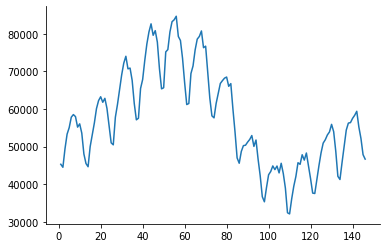

In [3]:
fig,ax = plt.subplots()
ax.plot(x, y)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Created a basic plot for private construction (y) in order to visualize the data and look for any trends or relationships.

The private construction data clearly does not indicate a linear trend.  Therefore the decomposition method from the second example was the method of choice for analysis of this data set.

C:\Users\17207\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Cumulative Squared Error: 4113523376.0387745
Average Squared Error per Month: 37395667.05489795
2003-07-31    1.803335e+07
2003-08-31    2.419711e+07
2003-09-30    9.290897e+06
2003-10-31    1.346482e+07
2003-11-30    2.719188e+05
                  ...     
2012-04-30    2.493460e+06
2012-05-31    2.058667e+06
2012-06-30    1.323060e+07
2012-07-31    1.708513e+07
2012-08-31    2.495363e+07
Freq: M, Name: sqError, Length: 110, dtype: float64


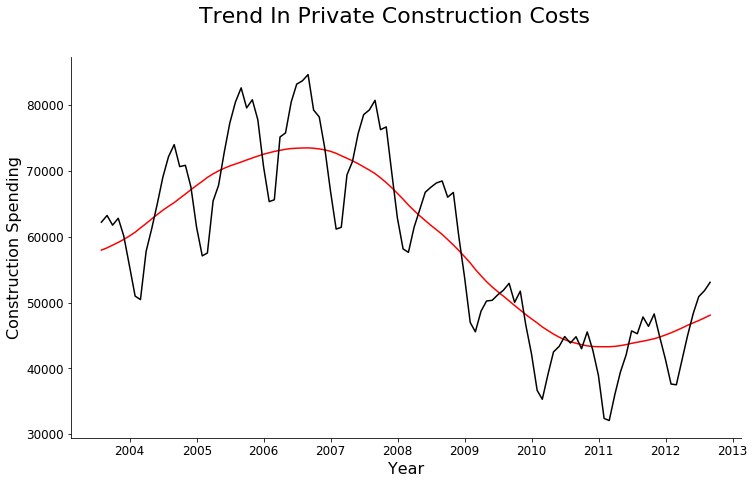

In [4]:
def sqError(row):
    return (row['Private Construction'] - row['MovAvg'])**2
    
df_constTSdata['MovAvg'] = np.NaN
df_constTSdata['sqError'] = np.NaN
df_constTSdata.index = pd.date_range(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = 
                                     len(df_constTSdata['Private Construction']))
# The data specified only number of months and not specific years.  I set the starting date as 1/31/2002 so that it 
# matched up with the month/year data listed in the second column of the .csv file.

window = 36
window = window - window % 2
# The window of 36 kept the trend line the smoothest.
for i in range(int(window/2),df_constTSdata.shape[0]-int(window/2)):
    df_constTSdata.loc[df_constTSdata.index[i],'MovAvg'] = (
        0.5*df_constTSdata.iloc[i - int(window/2)]['Private Construction'] + 
        df_constTSdata.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 
        0.5*df_constTSdata.iloc[i + int(window/2)]['Private Construction']
    )/float(window)
#print(df_constTSdata)

df_constTSdata['sqError'] = (df_constTSdata['Private Construction'] - df_constTSdata['MovAvg'])**2
df_constTSdata.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df_constTSdata['MovAvg'],label='Moving Average', color = 'r')
ax.plot(df_constTSdata['Private Construction'],label='Private Construction', color = 'k')
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Construction Spending', fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.set_size_inches(12,7)
fig.suptitle("Trend In Private Construction Costs",fontsize='22')
fig.savefig('privateconsttrend.jpg', dpi=2000)
print('Cumulative Squared Error:', sum(df_constTSdata['sqError']))
print('Average Squared Error per Month:', sum(df_constTSdata['sqError'])/len(df_constTSdata))
print(df_constTSdata['sqError'])

The code above prints the only the squared error for Private Construction and plots the trend line against the actual data. The squared error is calculated for each month, and both the cumulative and average squared error per month is indicated at the top of the table.

In [5]:
df_constTSdata['R2PvtConst'] = df_constTSdata['Private Construction'] - df_constTSdata['MovAvg']
df_constTSdata['R2ErrorPvtConst'] = abs((df_constTSdata['Private Construction'] - 
                                                    df_constTSdata['R2PvtConst'])/
                                                    df_constTSdata['Private Construction'])
df_constTSdata.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqError': '{:,.1f}'.format,
    'R2PvtConst': '{:,.1f}'.format,
    'R2ErrorPvtConst': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqError,R2PvtConst,R2ErrorPvtConst
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,57969.4,"18,033,352.0","4,246.6",0.932
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,58314.9,"24,197,107.6","4,919.1",0.922
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,58718.9,"9,290,896.7","3,048.1",0.951
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,59143.6,"13,464,822.5","3,669.4",0.942
2003-11-30 00:00:00,23,Nov-03,77915,60115,17801,59593.5,"271,918.8",521.5,0.991
2003-12-31 00:00:00,24,Dec-03,71050,55584,15466,60111.7,"20,500,394.3","-4,527.7",1.081
2004-01-31 00:00:00,25,Jan-04,64934,50975,13959,60687.3,"94,329,418.8","-9,712.3",1.191
2004-02-29 00:00:00,26,Feb-04,64138,50449,13689,61335.4,"118,514,067.8","-10,886.4",1.216
2004-03-31 00:00:00,27,Mar-04,73238,57796,15443,62017.4,"17,820,241.4","-4,221.4",1.073
2004-04-30 00:00:00,28,Apr-04,78354,61177,17177,62701.1,"2,322,787.7","-1,524.1",1.025


The table above prints out all of the preexisting data, labeled by month, and appends four columns on the far right of the table: Moving Average, Squared Error, **R2X** (Private Construction) that shows the model's error relative to the original data, and  **R2ErrorX** (Private Construction) that shows $R_2$ divided by the original data.

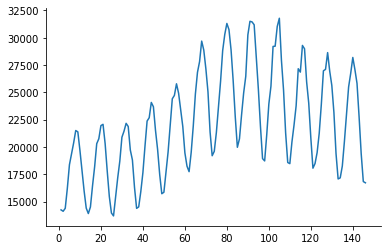

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Created a basic plot for public construction (y1) in order to visualize the data and look for any trends or relationships.

Although the public construction data is not as variable as the private construction data, it still does not indicate a linear trend.  Therefore the decomposition method from the second example was used once again.

Cumulative Squared Error: 1493970291.1101463
Average Squared Error per Month: 13581548.10100133
2003-07-31    7.314395e+06
2003-08-31    1.520220e+07
2003-09-30    1.592077e+07
2003-10-31    4.817354e+06
2003-11-30    1.361610e+05
                  ...     
2012-04-30    4.571638e+06
2012-05-31    3.186602e+05
2012-06-30    1.370717e+07
2012-07-31    1.506992e+07
2012-08-31    2.988353e+07
Freq: M, Name: sqError1, Length: 110, dtype: float64


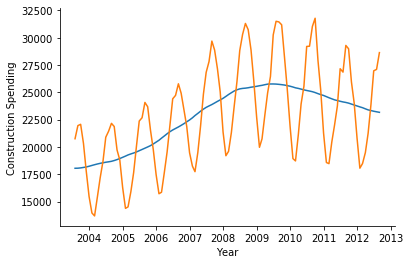

In [7]:
def sqError1(row):
    return (row['Public Construction'] - row['MovAvg1'])**2
    
df_constTSdata1['MovAvg1'] = np.NaN
df_constTSdata1['sqError1'] = np.NaN
df_constTSdata1.index = pd.date_range(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = 
                                     len(df_constTSdata1['Public Construction']))
# The data specified only number of months and not specific years.  I set the starting date as 1/31/2002 so that it 
# matched up with the month/year data listed in the second column of the .csv file.

window = 36
window = window - window % 2
# The window of 36 kept the trend line the smoothest.
for i in range(int(window/2),df_constTSdata1.shape[0]-int(window/2)):
    df_constTSdata1.loc[df_constTSdata1.index[i],'MovAvg1'] = (
        0.5*df_constTSdata1.iloc[i - int(window/2)]['Public Construction'] + 
        df_constTSdata1.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 
        0.5*df_constTSdata1.iloc[i + int(window/2)]['Public Construction']
    )/float(window)
#print(df_constTSdata1)

df_constTSdata1['sqError1'] = (df_constTSdata1['Public Construction'] - df_constTSdata1['MovAvg1'])**2
df_constTSdata1.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df_constTSdata1['MovAvg1'],label='Moving Average')
ax.plot(df_constTSdata1['Public Construction'],label='Public Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Cumulative Squared Error:', sum(df_constTSdata1['sqError1']))
print('Average Squared Error per Month:', sum(df_constTSdata1['sqError1'])/len(df_constTSdata1))
print(df_constTSdata1['sqError1'])

The code above prints the only the squared error for Private Construction and plots the trend line against the actual data. The squared error is calculated for each month, and the  both the cumulative and average squared error per month is indicated at the top of the table.

In [8]:
df_constTSdata1['R2PblcConst'] = df_constTSdata1['Public Construction'] - df_constTSdata1['MovAvg1']
df_constTSdata1['R2ErrorPblcConst'] = abs((df_constTSdata1['Public Construction'] - 
                                                    df_constTSdata1['R2PblcConst'])/
                                                    df_constTSdata1['Public Construction'])
df_constTSdata1.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqError': '{:,.1f}'.format,
    'R2PvtConst': '{:,.1f}'.format,
    'R2ErrorPvtConst': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg1,sqError1,R2PblcConst,R2ErrorPblcConst
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,18050.5,7.3144e+06,2704.51,0.869693
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,18058,1.52022e+07,3899,0.822426
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,18084.9,1.59208e+07,3990.08,0.819249
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,18126.2,4.81735e+06,2194.85,0.891991
2003-11-30 00:00:00,23,Nov-03,77915,60115,17801,18170,136161,-369,1.02073
2003-12-31 00:00:00,24,Dec-03,71050,55584,15466,18235.5,7.67013e+06,-2769.5,1.17907
2004-01-31 00:00:00,25,Jan-04,64934,50975,13959,18309.2,1.8924e+07,-4350.17,1.31164
2004-02-29 00:00:00,26,Feb-04,64138,50449,13689,18377,2.1977e+07,-4687.96,1.34246
2004-03-31 00:00:00,27,Mar-04,73238,57796,15443,18444.6,9.00967e+06,-3001.61,1.19437
2004-04-30 00:00:00,28,Apr-04,78354,61177,17177,18502,1.75562e+06,-1325,1.07714


The table above prints out all of the preexisting data, labeled by month, and appends four columns on the far right of the table: Moving Average, Squared Error, **R2X** (Public Construction) that shows the model's error relative to the original data, and **R2ErrorX** (Public Construction) that shows $R_2$ divided by the original data.

In [9]:
df_constTSdata['R1'] = df_constTSdata['Private Construction'] - df_constTSdata['MovAvg']
df_constTSdata['R1Error'] = abs((df_constTSdata['Private Construction'] - df_constTSdata['R1'])/df_constTSdata['Private Construction'])
df_constTSdata.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqError,R2PvtConst,R2ErrorPvtConst,R1,R1Error
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,57969.4,1.80334e+07,4246.57,0.931745,"4,246.6",0.932
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,58314.9,2.41971e+07,4919.06,0.922209,"4,919.1",0.922
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,58718.9,9.2909e+06,3048.1,0.950652,"3,048.1",0.951
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,59143.6,1.34648e+07,3669.44,0.941581,"3,669.4",0.942
2003-11-30 00:00:00,23,Nov-03,77915,60115,17801,59593.5,271919,521.458,0.991326,521.5,0.991
2003-12-31 00:00:00,24,Dec-03,71050,55584,15466,60111.7,2.05004e+07,-4527.74,1.08146,"-4,527.7",1.081
2004-01-31 00:00:00,25,Jan-04,64934,50975,13959,60687.3,9.43294e+07,-9712.33,1.19053,"-9,712.3",1.191
2004-02-29 00:00:00,26,Feb-04,64138,50449,13689,61335.4,1.18514e+08,-10886.4,1.21579,"-10,886.4",1.216
2004-03-31 00:00:00,27,Mar-04,73238,57796,15443,62017.4,1.78202e+07,-4221.4,1.07304,"-4,221.4",1.073
2004-04-30 00:00:00,28,Apr-04,78354,61177,17177,62701.1,2.32279e+06,-1524.07,1.02491,"-1,524.1",1.025


Average Residual:  113.25315656565621


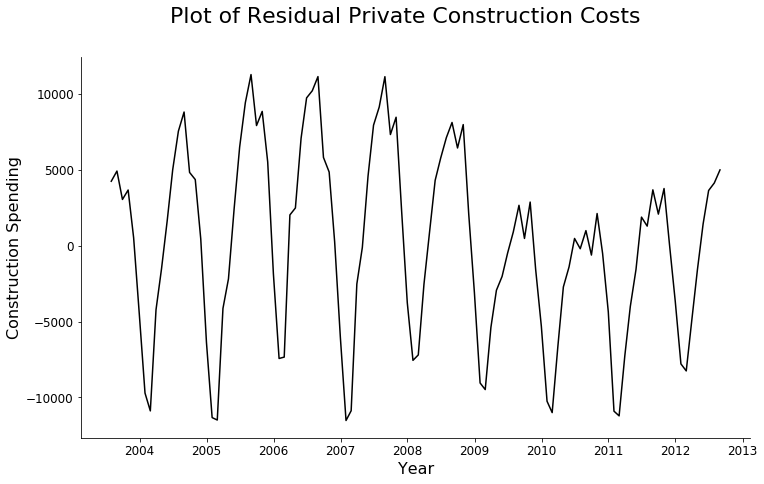

In [10]:
fig,ax = plt.subplots()
ax.plot(df_constTSdata['R1'], color = 'k')
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Construction Spending', fontsize = 16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df_constTSdata['R1'])/len(df_constTSdata))

fig.set_size_inches(12,7)
fig.suptitle("Plot of Residual Private Construction Costs",fontsize='22')
fig.savefig('residual.jpg', dpi=2000)

In [11]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_constTSdata['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)


Correlation, lag  1     0.8250475036301714
Correlation, lag  2     0.4820939752221449
Correlation, lag  3     0.0661838628463355
Correlation, lag  4     -0.29310582259154677
Correlation, lag  5     -0.5386625150984727
Correlation, lag  6     -0.6496282831082482
Correlation, lag  7     -0.549838477475518
Correlation, lag  8     -0.3185413831731611
Correlation, lag  9     0.02011606382325631
Correlation, lag  10     0.4117695258428452
Correlation, lag  11     0.732273100395526
Correlation, lag  12     0.894485171098422
Correlation, lag  13     0.729921369260746
Correlation, lag  14     0.40552141521868157
Correlation, lag  15     0.003123797466748202
Correlation, lag  16     -0.34159925855108386
Correlation, lag  17     -0.5745510163732714
Correlation, lag  18     -0.6812168241902572
Correlation, lag  19     -0.5902172854543252
Correlation, lag  20     -0.37531995989940653
Correlation, lag  21     -0.04750388422754723
Correlation, lag  22     0.3369494305895757
Correlation, lag  23     0

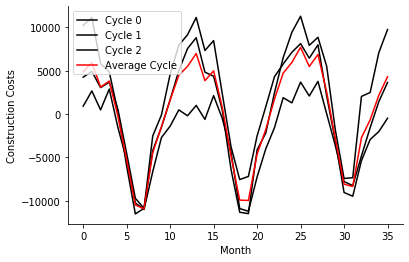

In [12]:
period = 36
cycleLen = period
numCycles = int(len(df_constTSdata)/cycleLen + 0.5)
cycles = [df_constTSdata.iloc[range(i*period,min((i+1)*period,len(df_constTSdata)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df_constTSdata.iloc[range(i,len(df_constTSdata['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

In [ ]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df_constTSdata)/cycleLen + 0.5)
df_constTSdata['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_constTSdata)):
    df_constTSdata.loc[df_constTSdata.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df_constTSdata['C'],label='Cyclic Pattern', color = 'b')
ax.plot(df_constTSdata['R1'],label='Remainder After Trend', color = 'k')
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Construction Spending', fontsize = 16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

fig.set_size_inches(12,7)
fig.suptitle("Fit of Seasonality Cycle",fontsize='22')
fig.savefig('seasonalityfit.jpg', dpi=2000)